In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math

In [2]:
contur_1 = np.array([complex(-1, 1),complex(3, 0),complex(-3, 0),complex(1, -1)])
contur_2 = np.array([complex(1, 1),complex(1, 0),complex(-1, -1),complex(-1, 0)])

# Скалярное произведение контуров

In [7]:
prod = np.dot(contur_1,contur_2)
print(prod)

(3+4j)


In [9]:
mult = 0

for i in range(len(contur_1)):
    mult += contur_1[i].real*contur_2[i].real - contur_1[i].imag*contur_2[i].imag + 1j*(contur_1[i].real*contur_2[i].imag + contur_1[i].imag*contur_2[i].real)
print(mult)

(3+4j)


In [40]:
m = 0
for c in contur_1:
    m += abs(c)**2
print(m)

n = 0
for c in contur_2:
    n += abs(c)**2
print(n)

22.0
6.000000000000001


# Отображение контура

In [17]:
def plot_contur(contur):
    real = [i.real for i in contur]
    imag = [i.imag for i in contur]

    real.append(real[0])
    imag.append(imag[0])

    plt.plot(real, imag,'r')

# АКФ

In [34]:
lst = np.copy(contur_hexagon)
akf = []
for i in range(len(lst)):
    lst = np.concatenate((lst[1:],lst[:1]), axis=0)
    akf.append(np.dot(lst, contur_hexagon))
    
print(akf)

[(-4+0j), (4+0j), (8+0j), (4+0j), (-4+0j), (-8+0j)]


# ВКФ

In [46]:
lst = np.copy(contur_1)
vkf = []
for i in range(len(lst)):
    lst = np.concatenate((lst[1:],lst[:1]), axis=0)
    vkf.append(np.dot(lst, contur_2))
    
print(max(vkf)/(n*m))

(0.02272727272727272+0.030303030303030297j)


In [27]:

print(contur_1)
lst = np.concatenate((contur_1[1:],contur_1[:1]), axis=0)
print(lst)

[-1.+1.j  1.+0.j -1.+0.j  1.-1.j]
[ 1.+0.j -1.+0.j  1.-1.j -1.+1.j]


# Эквализация

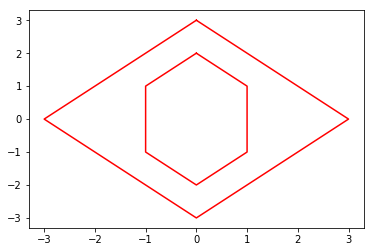

In [21]:
contur_square = [complex(0, 3),complex(3, 0),complex(0, -3),complex(-3, 0)]
contur_hexagon = [complex(0, 2),complex(1, 1),complex(1, -1),complex(0,-2),complex(-1, -1),complex(-1, 1)]

plot_contur(contur_square)
plot_contur(contur_hexagon)

# короткий в длинный

In [32]:
new_len = len(contur_hexagon)
old_len = len(contur_square)

contur_long = [0]*new_len

for i in range(new_len):
    ind = i * old_len / new_len
    j = int(ind - 0.5)
    k = ind - j
    contur_long[i] = contur_square[j]*(1-k) + contur_square[j+1]*k

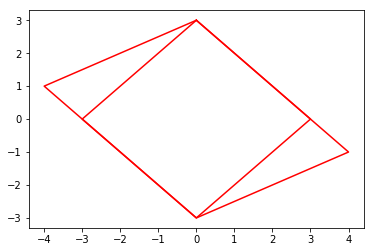

In [31]:
plot_contur(contur_long)
plot_contur(contur_square)

# длинный в короткий


In [25]:
new_len = len(contur_square)
old_len = len(contur_hexagon)

contur_short = [0]*new_len

for i in range(old_len):
    contur_short[int(i * new_len / old_len)] += contur_hexagon[i]

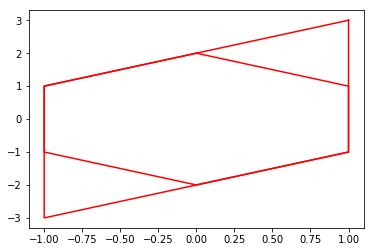

In [26]:
plot_contur(contur_short)
plot_contur(contur_hexagon)

# Вейвлеты Хаара

In [40]:
haar_1 = 0 
haar_2 = 0
haar_3 = 0

for i in range(len(akf)):
    if (i < len(akf)/2):
        haar_1 += akf[i]
    else:
        haar_1 -= akf[i]

print(haar_1)
        
for i in range(len(akf)):
    if (i < len(akf)/2):
        if (i < len(akf)/4):
            haar_2 += akf[i]
        else:
            haar_2 -= akf[i]
    else:
        if (i < 3 * len(akf)/4):
            haar_2 += akf[i]
        else:
            haar_2 -= akf[i]
        
print(haar_2)

for i in range(len(akf)):
    if (i%2 == 0):
        haar_3 += akf[i]
    else:
        haar_3 -= akf[i]
        
print(haar_3)

(16+0j)
0j
0j


# Поворот Оуэна-Македона

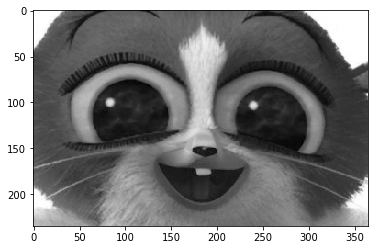

In [74]:
im = plt.imread('S:\img__.jpg')
plt.imshow(im[:,:,1], cmap = 'gray')

In [6]:
alpha = 60

In [9]:
al = math.pi/6

A = [[math.cos(al),-math.sin(al)],[math.sin(al), math.cos(al)]]

In [62]:
A1 = [[1, -math.tan(al)/2],[0, 1]]

A2 = [[1,0],[ math.sin(al), 1]]

A3 = [[1,-math.tan(al)/2],[0, 1]]

# Поворот через обычную матрицу поворота

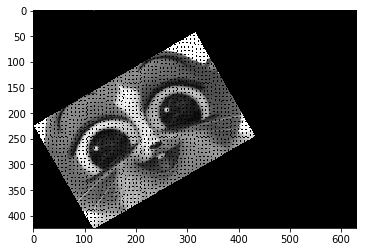

In [77]:
def rotate(matr_im, matr_rot):
    
    rot_matr = np.zeros((int(303*1.4), int(450*1.4)))
    
    for i in range(1, len(matr_im)-1):
        for j in range (1, len(matr_im[i])-1):
            new_coord = [0,0]
            new_coord = np.dot(matr_rot, [[i], [j]])
            rot_matr[int(round(new_coord[0][0])-200), int(round(new_coord[1][0]))] = matr_im[i, j][0]
    return rot_matr

rot_im = rotate(im, A)
plt.imshow(rot_im, cmap='gray')

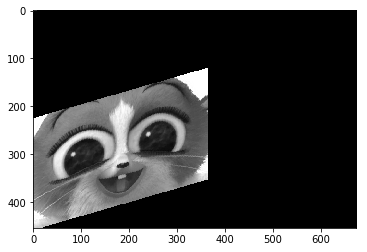

In [63]:
def rotate1(matr_im, matr_rot):
    
    rot_matr = np.zeros((int(303*1.5), int(450*1.5)))
    
    for i in range(1, len(matr_im)-1):
        for j in range (1, len(matr_im[i])-1):
            new_coord = [0,0]
            new_coord = np.dot(matr_rot, [[i], [j]])
            rot_matr[int(round(new_coord[0][0]))-230, int(round(new_coord[1][0]))] = matr_im[i, j][0]
    return rot_matr

rot_im_ou1 = rotate1(im, A3)
plt.imshow(rot_im_ou1, cmap = 'gray')

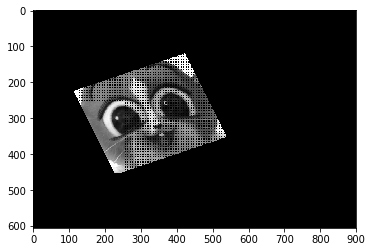

In [64]:
def rotate2(matr_im, matr_rot):
    
    rot_matr = new_im = np.zeros((int(303*2), int(450*2)))
    
    for i in range(1, len(matr_im)-1):
        for j in range (1, len(matr_im[i])-1):
            new_coord = [0,0]
            new_coord = np.dot(matr_rot, [[i], [j]])
            rot_matr[int(round(new_coord[0][0])), int(round(new_coord[1][0]))] = matr_im[i, j]
    return rot_matr

rot_im_ou2 = rotate2(rot_im_ou1, A2)
plt.imshow(rot_im_ou2, cmap = 'gray')

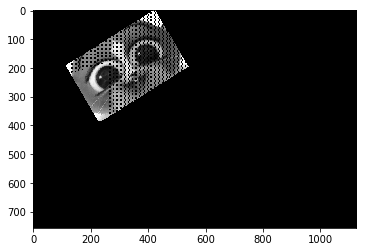

In [71]:
def rotate3(matr_im, matr_rot):
    
    rot_matr = new_im = np.zeros((int(303*2.5), int(450*2.5)))
    
    for i in range(1, len(matr_im)-1):
        for j in range (1, len(matr_im[i])-1):
            new_coord = [0,0]
            new_coord = np.dot(matr_rot, [[i], [j]])
            rot_matr[int(round(new_coord[0][0])), int(round(new_coord[1][0]))] = matr_im[i, j]
    return rot_matr

rot_im_ou3 = rotate3(rot_im_ou2, A1)
plt.imshow(rot_im_ou3, cmap = 'gray')

In [69]:
from skimage.io import imsave
imsave('S:\chb.jpg',rot_im_ou3)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


# Преобразование яркости по среднему

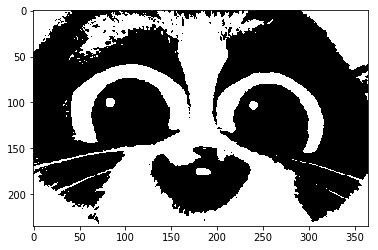

In [11]:
im = plt.imread('S:\img__.jpg')
plt.imshow(im[:,:,1])

def brightness(pix):
    return 0.222*pix[0]+0.707*pix[1]+0.071*pix[2]

def mid_bright(im):
    mid = 0
    
    for i in range(len(im)):
        for j in range(len(im[i])):
            mid += brightness(im[i][j]) 
                
    return mid / len(im) / len(im[i])

def to_monpchom_base(im, step):
    new_im = np.zeros((235, 365))
    
    for i in range(len(im)):
        for j in range(len(im[i])):
            #new_im[i][j] = brightness(im[i][j])
            if (brightness(im[i][j]) > step):
                new_im[i][j] = 255
            else:
                new_im[i][j] = 0
            
    return new_im

step = mid_bright(im)
mono_im_base = to_monpchom_base(im, step)
plt.imshow(mono_im_base, cmap = 'gray')

# Адаптивное преобразование яркости

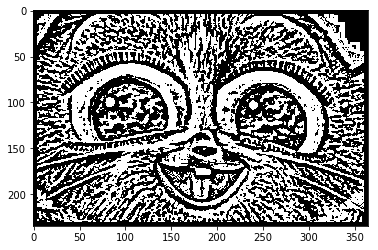

In [79]:
def to_monpchom_adapt(im, size_sq):
    new_im = np.zeros((235, 365))
    
    for i in range(size_square, len(im) - size_square):
        for j in range(size_square, len(im[i]) - size_square):
            
            curr_mid_br = 0
            
            for k in range(i-size_sq, i+size_sq):
                for l in range(j-size_sq, j+size_sq):
                    curr_mid_br += brightness(im[k][l])
                    
            curr_mid_br /=  (size_square + size_square)**2
            
            if ((brightness(im[i][j])) > curr_mid_br):
                new_im[i][j] = 255
            else:
                new_im[i][j] = 0
    return new_im


size_square = 4
mono_im_adapt = to_monpchom_adapt(im, size_square)
plt.imshow(mono_im_adapt, cmap = 'gray')

# k-means

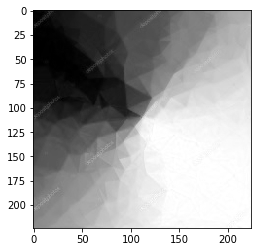

In [4]:
#im_cl = plt.imread('S:\clust_.png')
im_cl = plt.imread('S:\grad.jpg')
plt.imshow(im_cl[:,:,1], cmap = 'gray')

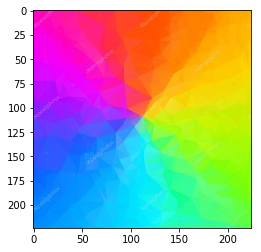

In [5]:
plt.imshow(im_cl)

In [6]:
colors = ['r','g','b','y','p']

num_cluster = 4

# x = range(len(im_cl))
# y = range(len(im_cl[0]))
# coord = list(np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]))

# result = {tuple(i): 0 for i in coord}

new_im = np.zeros((len(im_cl),len(im_cl[0])))

In [7]:
#centres = [[90, 30], [80,125], [90,175],[160,100]]
centres = [[50, 50], [50,150], [150,50],[150,150]]

In [8]:
print(centres)

[[50, 50], [50, 150], [150, 50], [150, 150]]


In [9]:
for pix_x in range(len(im_cl)):
    for pix_y in range(len(im_cl[pix_x])):
        
        dist = np.zeros(num_cluster)
        
        for i in range(num_cluster):
            col = 0;
            col = abs(math.sqrt(im_cl[pix_x, pix_y, 0]**2 + im_cl[pix_x, pix_y, 1]**2 + im_cl[pix_x, pix_y, 2]**2) - math.sqrt(im_cl[centres[i][0], centres[i][1], 0]**2 + im_cl[centres[i][0], centres[i][1], 1]**2 + im_cl[centres[i][0], centres[i][1], 2]**2))
            #col = abs(math.sqrt(im_cl[pix_x, pix_y, 0]**2  - math.sqrt(im_cl[centres[i][0], centres[i][1], 0]**2 )))
            
            dist[i] = col
            
        new_im[pix_x, pix_y] = int(np.where(dist == np.amin(dist))[0][0])                                
                                            

In [104]:
for i in range(num_cluster):
    new_centr_x = 0
    new_centr_y = 0
    num = 0
    
    for pix_x in range(len(im_cl)):
        for pix_y in range(len(im_cl[pix_x])):
            if (new_im[pix_x, pix_y] == i):
                new_centr_x += pix_x
                new_centr_y += pix_y
                num += 1
                
    centres[i][0] = int(new_centr_x / (num+1))
    centres[i][1] = int(new_centr_y / (num+1))

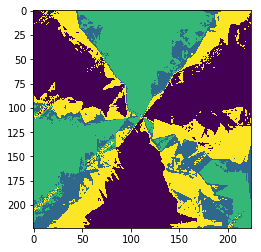

In [10]:
plt.imshow(new_im)

# Рекурсивный алгоритм поиска регионов

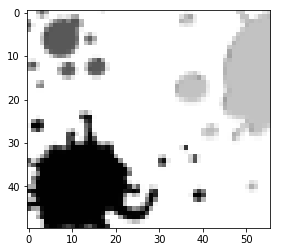

In [4]:
im_reg = plt.imread('S:\clust__.png')
plt.imshow(im_reg[:,:,1], cmap = 'gray')

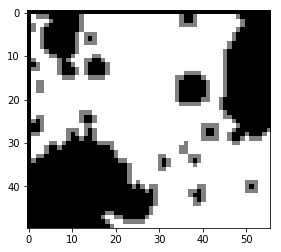

In [15]:
new_im = np.zeros((len(im_reg),len(im_reg[0])))

def region(img, x, y):
    if (new_im[x,y] == 0):
        if (img[x,y,1] == 1):
            new_im[x,y] = 2
        
            if (x < len(img)-1 and new_im[x+1,y] == 0):
                region(img, x+1, y)

            if (x > 1 and new_im[x-1,y] == 0):
                region(img, x-1, y)

            if (y < len(img[0])-1 and new_im[x,y+1] == 0):
                region(img, x, y+1)

            if (y > 1 and new_im[x,y-1] == 0):
                region(img, x, y-1)
        else:
            new_im[x,y] = 1
    
region(im_reg, 20, 30)    
plt.imshow(new_im, cmap = 'gray')

# Алгоритм Оуэна-Македона

In [1]:
from PIL import Image
import numpy as np

In [30]:
x_0, y_0 = 150,350

def get_rgb_matrix(img):
    pix = img.load()
    rgb_matrix = np.ones((*img.size, 3))
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            rgb_matrix[i,j] = pix[i,j]
    return rgb_matrix


def rotation_0(img, angle=np.pi/4):
    rot = np.zeros(img.shape)
    
    rot_list = {}
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = int(i - np.tan(angle/2)*(j-y_0))
            y = int(j)
            try:
                #rot[x,y] = img[i,j] 
                rot_list[(x,y)] = img[i,j]
            except IndexError:
                continue
    return rot_list
        
def rotation_1(img, angle=np.pi/4):
    #rot = np.zeros(img.shape)
    
    rot_list = {}
    
    for i in img:
        #print(i)
        x = i[0]
        y = int(np.sin(angle)*(i[0]-x_0) + i[1])
        try:
            #rot[x,y] = img[i,j] 
            rot_list[(x,y)] = img[i]
        except IndexError:
            continue
    return rot_list

def rotation_2(img, shape=(500,500), angle=np.pi/4):
    rot = np.zeros(shape)
    
    for i in img:
        x = int(i[0] - np.tan(angle/2)*(i[1]-y_0))
        y = int(i[1])
        try:
            if(x>0) and y>0:
                rot[x,y] = img[i] 
        except IndexError:
            continue
    return rot

In [8]:
def brightness_img(img):
    rgb = img.load()
    size = img.size
    
    brightness_matrix = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            brightness_matrix[i,j] = brightness(*rgb[i,j])
    return brightness_matrix

def brightness(r,g,b):
    return 0.222*r+0.707*g+0.071*b

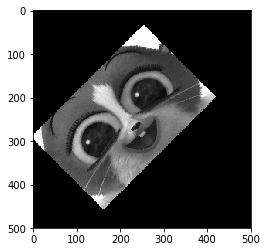

In [31]:
from matplotlib import pyplot as plt
# хранить в списке координаты
# отрицательные сниху пробиваются
from PIL import Image

im = Image.open('S:\img__.jpg')
pix = im.load()
plt.imshow(rotation_2(rotation_1(rotation_0(brightness_img(im.transpose(Image.TRANSPOSE))))),cmap='gray')

# Кластеризация кратчайшим незамкнутым путем

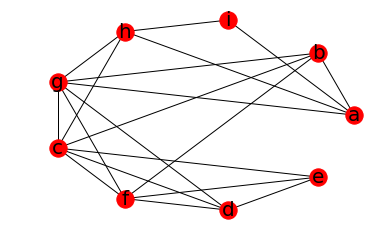

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=2)
G.add_edge('a', 'i', weight=3)
G.add_edge('a', 'h', weight=5)
G.add_edge('a', 'g', weight=9)
G.add_edge('b', 'c', weight=8)
G.add_edge('b', 'f', weight=9)
G.add_edge('b', 'g', weight=16)
G.add_edge('c', 'd', weight=14)
G.add_edge('c', 'e', weight=5)
G.add_edge('c', 'f', weight=12)
G.add_edge('c', 'g', weight=1)
G.add_edge('c', 'h', weight=11)
G.add_edge('d', 'e', weight=13)
G.add_edge('d', 'f', weight=5)
G.add_edge('d', 'g', weight=16)
G.add_edge('e', 'f', weight=6)
G.add_edge('f', 'g', weight=15)
G.add_edge('g', 'h', weight=8)
G.add_edge('h', 'i', weight=6)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) ]

# positions for all nodes
pos = nx.shell_layout(G)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,width=1)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

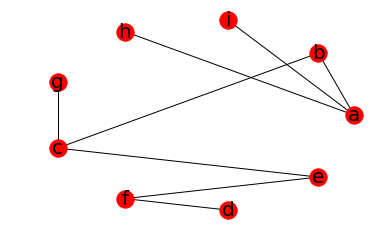

In [51]:
min_tree_G = nx.minimum_spanning_tree(G)

elarge = [(u, v) for (u, v, d) in min_tree_G.edges(data=True) ]

# positions for all nodes
pos = nx.shell_layout(G)
# nodes
nx.draw_networkx_nodes(min_tree_G, pos, node_size=300)

# edges
nx.draw_networkx_edges(min_tree_G, pos, edgelist=elarge,width=1)

# labels
nx.draw_networkx_labels(min_tree_G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [72]:
edge = {(u, v):d['weight'] for (u, v, d) in min_tree_G.edges(data=True)}
print(edge)


{('a', 'b'): 2, ('a', 'i'): 3, ('a', 'h'): 5, ('b', 'c'): 8, ('g', 'c'): 1, ('c', 'e'): 5, ('f', 'd'): 5, ('f', 'e'): 6}


In [73]:
list_d = list(edge.items())
list_d.sort(key=lambda i: i[1])
for i in list_d:
    print(i[0], ':', i[1])

('g', 'c') : 1
('a', 'b') : 2
('a', 'i') : 3
('a', 'h') : 5
('c', 'e') : 5
('f', 'd') : 5
('f', 'e') : 6
('b', 'c') : 8


In [83]:
num_clust = 2

num_edges = min_tree_G.number_of_edges()

G_clust = min_tree_G.copy()

for i in range(num_clust):
    G_clust.remove_edge(list_d[num_edges- i - 1][0][0], list_d[num_edges - i - 1][0][1])
    print(list_d[num_edges- i - 1][0][0], list_d[num_edges - i - 1][0][1])

b c
f e


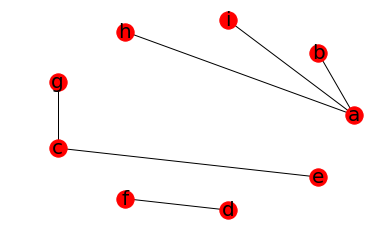

In [84]:
elarge = [(u, v) for (u, v, d) in G_clust.edges(data=True) ]

# positions for all nodes
pos = nx.shell_layout(G)
# nodes
nx.draw_networkx_nodes(G_clust, pos, node_size=300)

# edges
nx.draw_networkx_edges(G_clust, pos, edgelist=elarge,width=1)

# labels
nx.draw_networkx_labels(G_clust, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

# Быстрое корреляционное распознавание цифр

In [7]:
num_0 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1 ,0]]

num_1 = [[0, 0, 1, 0, 0],
         [0, 1, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 1, 1, 0]]

num_2 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1]]

num_3 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1], 
         [0, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0]]

num_4 = [[1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1]]

num_5 = [[1, 1, 1, 1, 1],
         [1, 0, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [1, 1, 1, 1, 0]]

num_6 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0]]

num_7 = [[1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]]

num_8 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1 ,0]]

num_9 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1 ,0]]
         

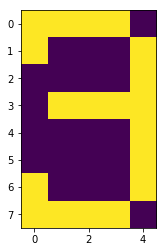

In [34]:
plt.imshow(input_num)

In [33]:
input_num = [[1, 1, 1, 1, 0],
             [1, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [0, 1, 1, 1, 1],
             [0, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [1, 0, 0, 0, 1],
             [1, 1, 1, 1, 0]]

In [35]:
dif = [0]*10
number = [num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9]

for i in range(len(input_num)):
    for j in range(len(input_num[0])):
        
        if (input_num[i][j] == 1):
            for n in range(10):
                if (number[n][i][j] == 0):
                    dif[n] = dif[n] - 1
                if (number[n][i][j] == 1):
                    dif[n] = dif[n] + 1
                    
for n in range(10):
    dif[n] = dif[n] / sum([sum(el) for el in number[n]])
        
diff = np.array(dif)        
print(diff.argmax())        

9


In [6]:
sum([sum(el) for el in input_num])

20

In [20]:
import numpy as np
import matplotlib.pyplot as plt